In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 10
%matplotlib inline

In [32]:
electromen = pd.read_csv("./raw_data/electromenager.csv", sep=";", skiprows=2)
electromen.columns = ["date", "indice", "autre"]
electromen = electromen[["date", "indice"]]
electromen = electromen.sort_values(by=["date"])
electromen.index = pd.to_datetime(electromen["date"])
electromen.head()

,date,indice
date,,
2005-01-01,2005-01,48.25
2005-02-01,2005-02,44.86
2005-03-01,2005-03,49.79
2005-04-01,2005-04,52.08
2005-05-01,2005-05,53.33


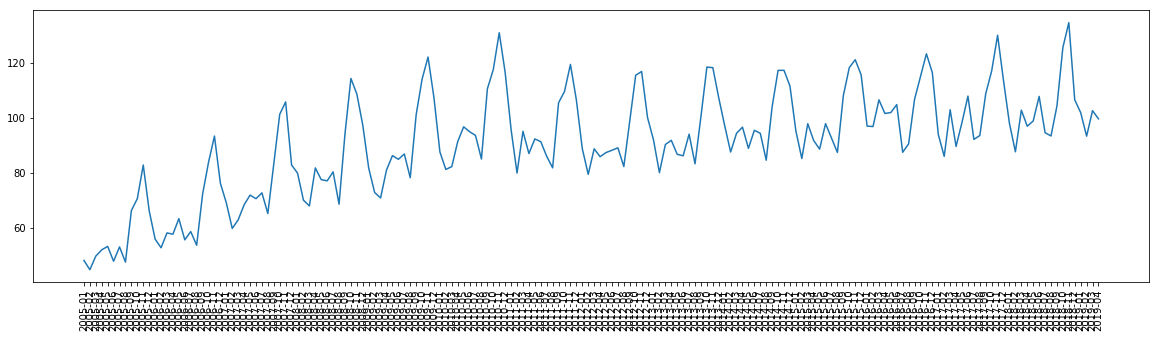

In [9]:
fig = plt.figure(1, figsize=(20, 5))
plt.xticks(rotation="vertical")
plt.plot(electromen["date"], electromen["indice"])

In [12]:
from statsmodels.tsa.stattools import adfuller
import pdb
def test_stationarity(timeseries):    
    # Determing rolling statistics  
    rolmean = timeseries.rolling(window=12).mean()
    # Plot rolling statistics:  
    fig = plt.figure(1, figsize=(20, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')  
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')  
    plt.legend(loc='best')  
    plt.title('Rolling Mean')  
    plt.show(block=False)    
    # Perform Augmented Dickey-Fuller test:  
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])  
    for key,value in dftest[4].items():    
        dfoutput['Critical Value (%s)'%key] = value  
    print(dfoutput)

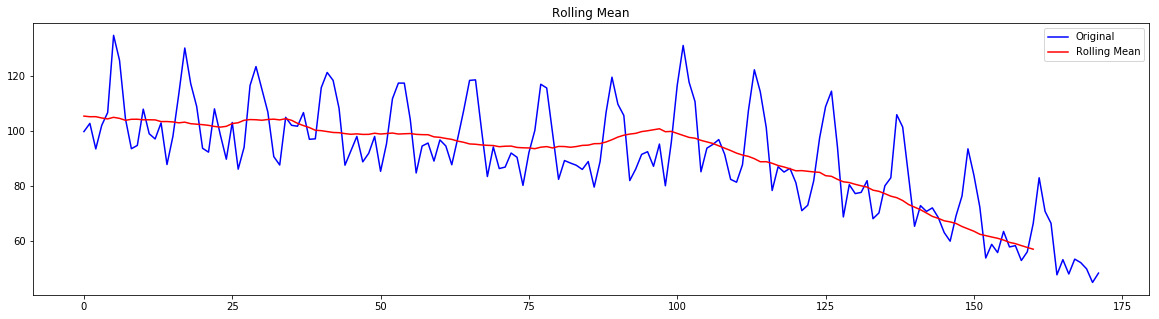

Results of Augmented Dickey-Fuller test:
Test Statistic                  -2.587611
p-value                          0.095585
#Lags Used                      14.000000
Number of Observations Used    157.000000
Critical Value (1%)             -3.472703
Critical Value (5%)             -2.880132
Critical Value (10%)            -2.576683
dtype: float64


In [13]:
test_stationarity(electromen["indice"])

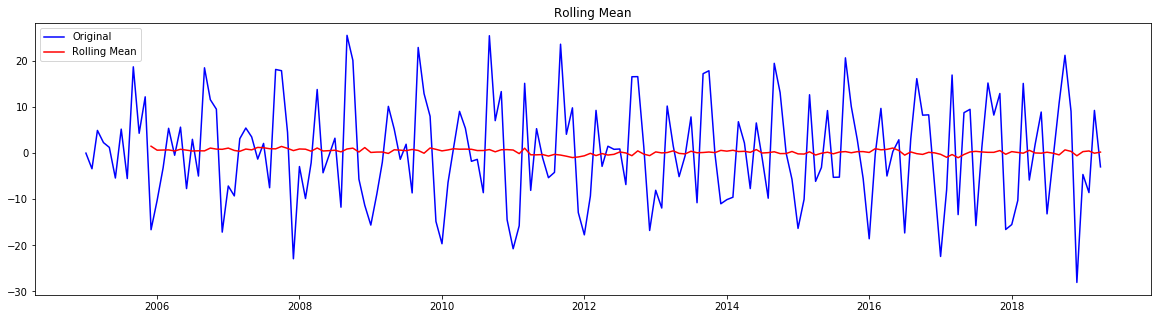

Results of Augmented Dickey-Fuller test:
Test Statistic                  -2.686880
p-value                          0.076336
#Lags Used                      14.000000
Number of Observations Used    157.000000
Critical Value (1%)             -3.472703
Critical Value (5%)             -2.880132
Critical Value (10%)            -2.576683
dtype: float64


In [42]:
# Let’s see if differentiating makes the series stationnary
electromen_diff = pd.DataFrame(electromen["indice"].diff().fillna(0))
test_stationarity(electromen_diff["indice"])

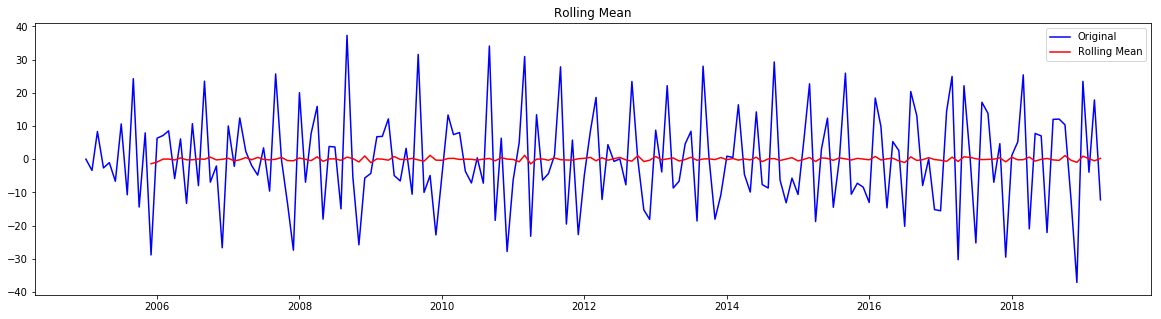

Results of Augmented Dickey-Fuller test:
Test Statistic                -1.453479e+01
p-value                        5.260478e-27
#Lags Used                     1.200000e+01
Number of Observations Used    1.590000e+02
Critical Value (1%)           -3.472161e+00
Critical Value (5%)           -2.879895e+00
Critical Value (10%)          -2.576557e+00
dtype: float64


In [43]:
electromen_ddiff = pd.DataFrame(electromen_diff["indice"].diff().fillna(0))
test_stationarity(electromen_ddiff["indice"])

In [38]:
from statsmodels.tsa.arima_model import ARIMA

import itertools

compute = True
if compute:
    p = q = range(0, 4)
    pq = itertools.product(p, q)
    for param in pq:  
        try:    
            mod = ARIMA(electromen["indice"], order=(param[0], 2, param[1]))    
            results = mod.fit()    
            print('ARIMA{} - AIC:{}'.format((param[0], 2, param[1]), results.aic))  
        except Exception as e:
            print(e)
            continue

/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was pro

ARIMA(0, 2, 0) - AIC:1403.1297763256166
ARIMA(0, 2, 1) - AIC:1313.3315869921494
ARIMA(0, 2, 2) - AIC:1311.7729167309553
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(1, 2, 0) - AIC:1386.22899743389
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.


/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was pro

ARIMA(1, 2, 3) - AIC:1275.6536511698157
ARIMA(2, 2, 0) - AIC:1379.8555748748795
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.


/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was pro

ARIMA(2, 2, 2) - AIC:1264.3632422483636
ARIMA(2, 2, 3) - AIC:nan
ARIMA(3, 2, 0) - AIC:1367.295407274722
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.


/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provi

ARIMA(3, 2, 2) - AIC:nan
ARIMA(3, 2, 3) - AIC:1264.3911929815936


/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/vincentvillet/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


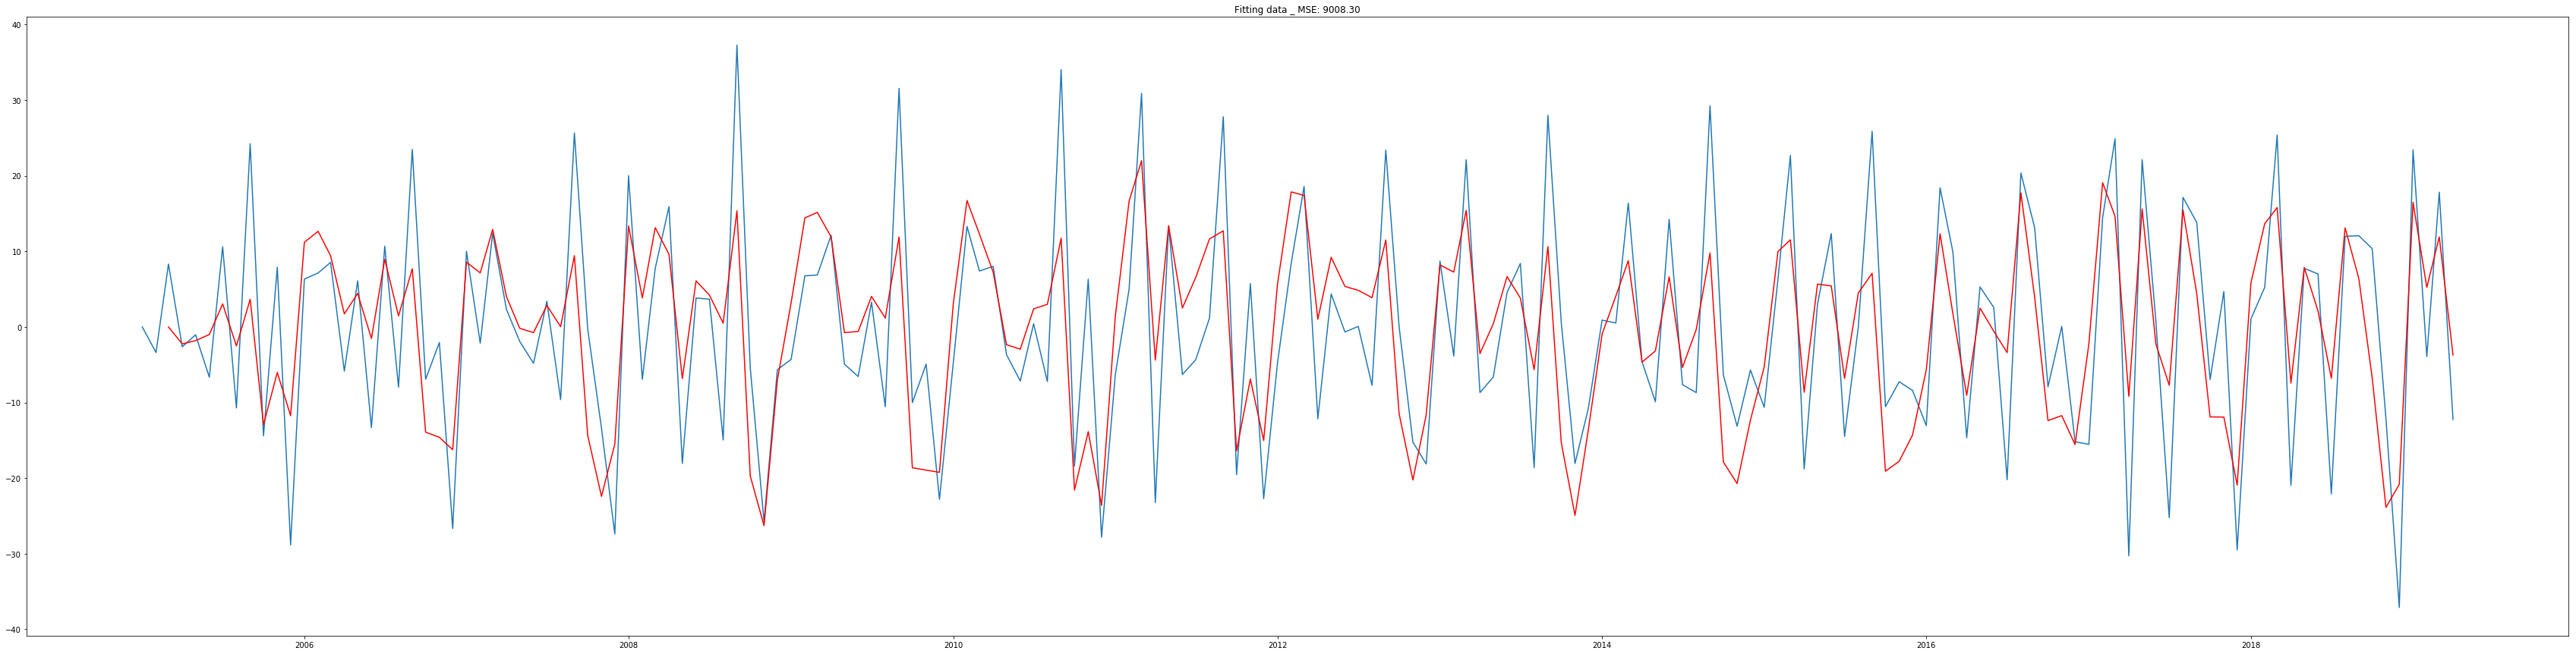

In [44]:
model = ARIMA(electromen["indice"], order=(2, 2, 2))
results_MA = model.fit()
fig = plt.figure(1, figsize=(60, 15))
plt.plot(electromen_ddiff["indice"])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-electromen["indice"])**2).mean()))
plt.show()

In [48]:
predictions = results_MA.predict('2010-01', '2019-01').values

ValueError: Length of passed values is 109, index implies 110

In [ ]:
from scipy.integrate import trapz

int_1 = 